### Install jsonlines if you need it

import sys
!conda install --yes --prefix {sys.prefix} jsonlines

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import jsonlines

## Read the simulation output

First as raw JSON lines

In [2]:
HISTORY_FILE = 'test_data/experiment_output.json'

In [3]:
history = []
with jsonlines.open(HISTORY_FILE) as reader:
    for obj in reader:
        history.append(obj)

Functions to process the history

In [4]:
def process_history(history, fair=True, compat=True, alloc=True, lists=True):
    if fair:
        fair_list = [entry['allocation']['fairness scores'] for entry in history]
        fair_df = pd.DataFrame(fair_list)
    else:
        fair_df = None
        
    if compat:
        compat_list = [entry['allocation']['compatibility scores'] for entry in history]
        compat_df = pd.DataFrame(compat_list)
    else:
        compat_df = None
        
    if alloc:
        alloc_list = [entry['allocation']['output'] for entry in history]
        alloc_df = pd.DataFrame(alloc_list)
    else:
        alloc_df = None
        
    if lists:
        results_list = [process_results(entry['choice']['output']['results']) for entry in history]
    else:
        results_list = None
        
    return fair_df, compat_df, alloc_df, results_list

def process_results(result_structs):
    return [(entry['item'], entry['score']) for entry in result_structs]
        

Get the individual data frames and result lists

In [5]:
fair_df, compat_df, alloc_df, results = process_history(history)

In [6]:
fair_df

,Feature 1 Agent,Feature 2 Agent
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [7]:
compat_df

,Feature 1 Agent,Feature 2 Agent
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [8]:
alloc_df

,Feature 1 Agent,Feature 2 Agent
0,0.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [9]:
results[0]

[('3.0', 0.9916083184521989),
 ('61.0', 0.9869681718180684),
 ('9.0', 0.9831647517166043),
 ('30.0', 0.9718652122674637),
 ('60.0', 0.9708455370291859),
 ('96.0', 0.9512253063616523),
 ('57.0', 0.945376810147492),
 ('83.0', 0.936571031917057),
 ('70.0', 0.9354435319546894),
 ('43.0', 0.9312513378788202)]

## Visualizations

Simple plot of the fairness values computed at each iteration

<AxesSubplot:xlabel='index', ylabel='value'>

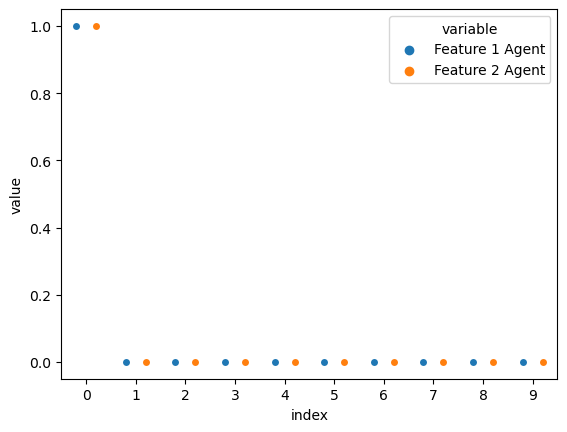

In [10]:
fair_df_melt = fair_df.reset_index().melt(id_vars=['index'])
sb.stripplot(data=fair_df_melt, x='index', y='value', hue='variable', dodge=True)

Same for allocation

<AxesSubplot:xlabel='index', ylabel='value'>

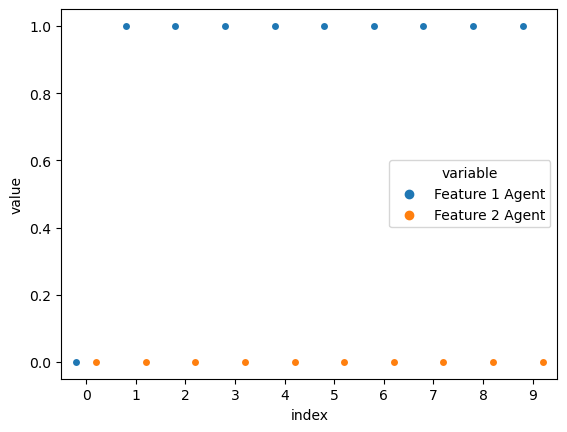

In [11]:
alloc_df_melt = alloc_df.reset_index().melt(id_vars=['index'])
sb.stripplot(data=alloc_df_melt, x='index', y='value', hue='variable', dodge=True)